In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from wordcloud import WordCloud

C:\Users\prate\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.8' currently installed).
  warnings.warn(msg, UserWarning)
C:\Users\prate\Anaconda3\lib\site-packages\sklearn\feature_extraction\image.py:167: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int):
C:\Users\prate\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:35: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `f

In [2]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow .keras.layers import Dense, Embedding, LSTM, Conv1D, MaxPool1D
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

C:\Users\prate\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\prate\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\prate\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\prate\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarning: Passi

In [3]:
fake = pd.read_csv('data/Fake.csv')
true = pd.read_csv('data/True.csv')

In [4]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [5]:
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [6]:
fake['subject'].value_counts()

News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: subject, dtype: int64

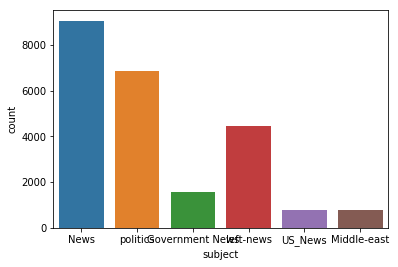

In [7]:
sns.countplot(x = 'subject', data = fake)

In [8]:
text_fake = ' '.join(fake['text'].tolist())
text_true = ' '.join(true['text'].tolist())

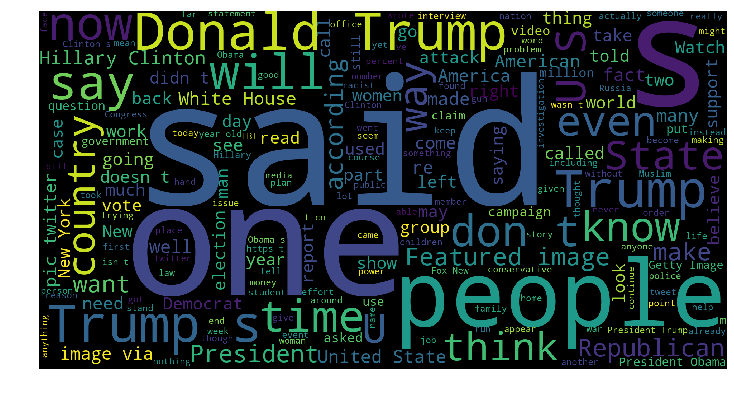

In [9]:
wordcloud = WordCloud(width = 1920, height = 1000).generate(text_fake)
fig = plt.figure(figsize = (10, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

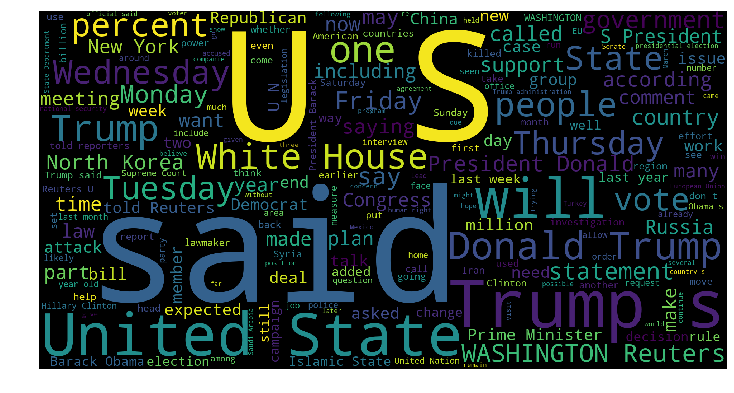

In [10]:
wordcloud = WordCloud(width = 1920, height = 1000).generate(text_true)
fig = plt.figure(figsize = (10, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

In [11]:
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [12]:
unknown_publishers = []

for index, row in enumerate(true['text'].values):
    try:
        record = row.split('-', maxsplit = 1) # Check if 
        record[1]
        
        assert(len(record[0])<120)
        
    except:
        unknown_publishers.append(index)

In [13]:
len(unknown_publishers)

222

In [14]:
publisher = []
temp_text = []

for index, row in enumerate(true.text.values):
    if index in unknown_publishers:
        temp_text.append(row)
        publisher.append('Unknown')
        
    else:
        record = row.split('-', maxsplit = 1)
        publisher.append(record[0].strip())
        temp_text.append(record[1].strip())

In [15]:
true['publisher'] = publisher
true['text'] = temp_text

In [16]:
true.head()

,title,text,subject,date,publisher
0,"As U.S. budget fight looms, Republicans flip t...",The head of a conservative Republican faction ...,politicsNews,"December 31, 2017",WASHINGTON (Reuters)
1,U.S. military to accept transgender recruits o...,Transgender people will be allowed for the fir...,politicsNews,"December 29, 2017",WASHINGTON (Reuters)
2,Senior U.S. Republican senator: 'Let Mr. Muell...,The special counsel investigation of links bet...,politicsNews,"December 31, 2017",WASHINGTON (Reuters)
3,FBI Russia probe helped by Australian diplomat...,Trump campaign adviser George Papadopoulos tol...,politicsNews,"December 30, 2017",WASHINGTON (Reuters)
4,Trump wants Postal Service to charge 'much mor...,President Donald Trump called on the U.S. Post...,politicsNews,"December 29, 2017",SEATTLE/WASHINGTON (Reuters)


In [17]:
true.shape

(21417, 5)

In [18]:
empty_fake_index = [index for index, text in enumerate(fake['text'].tolist()) if str(text.strip()) == ""]

In [19]:
fake.iloc[empty_fake_index]

,title,text,subject,date
10923,TAKE OUR POLL: Who Do You Think President Trum...,,politics,"May 10, 2017"
11041,Joe Scarborough BERATES Mika Brzezinski Over “...,,politics,"Apr 26, 2017"
11190,WATCH TUCKER CARLSON Scorch Sanctuary City May...,,politics,"Apr 6, 2017"
11225,MAYOR OF SANCTUARY CITY: Trump Trying To Make ...,,politics,"Apr 2, 2017"
11236,SHOCKER: Public School Turns Computer Lab Into...,,politics,"Apr 1, 2017"
...,...,...,...,...
21816,BALTIMORE BURNS: MARYLAND GOVERNOR BRINGS IN N...,,left-news,"Apr 27, 2015"
21826,FULL VIDEO: THE BLOCKBUSTER INVESTIGATION INTO...,,left-news,"Apr 25, 2015"
21827,(VIDEO) HILLARY CLINTON: RELIGIOUS BELIEFS MUS...,,left-news,"Apr 25, 2015"
21857,(VIDEO)ICE PROTECTING OBAMA: WON’T RELEASE NAM...,,left-news,"Apr 14, 2015"


In [20]:
true['text'] = true['text'] + " " + true['title']
true['text'] = true['text'].apply(lambda x: str(x).lower())

In [21]:
fake['text'] = fake['text'] + " " + fake['title']
fake['text'] = fake['text'].apply(lambda x: str(x).lower())

# Preprocessing text

In [22]:
true['class'] = 1
fake['class'] = 0

In [23]:
true = true[['text', 'class']]
fake = fake[['text', 'class']]

In [24]:
data = true.append(fake, ignore_index = True)

In [25]:
import re

In [26]:
def remove_special_characters(line):
    line = re.sub("[^a-zA-Z0-9\s]","", line)
    line = re.sub(' +', ' ', line)
    
    return line

In [27]:
data['text'] = data['text'].apply(remove_special_characters)

## Vectorization

In [28]:
import gensim

In [29]:
y = data['class'].values

In [30]:
X = [d.split() for d in data['text'].tolist()]

In [31]:
DIM = 100
w2v_model = gensim.models.Word2Vec(sentences = X, vector_size = DIM, window = 10, min_count = 1)

In [32]:
w2v_model

In [33]:
w2v_model.wv.most_similar('love')

[('thank', 0.7507554292678833),
 ('appreciate', 0.7007562518119812),
 ('applaud', 0.6969866156578064),
 ('wish', 0.6712661981582642),
 ('bless', 0.6624990105628967),
 ('admire', 0.6593628525733948),
 ('pray', 0.6340712904930115),
 ('wonderful', 0.6285472512245178),
 ('beautiful', 0.6189867854118347),
 ('passion', 0.6127997040748596)]

In [34]:
tokenizer = Tokenizer()

In [35]:
tokenizer.fit_on_texts(X)

In [36]:
X = tokenizer.texts_to_sequences(X)

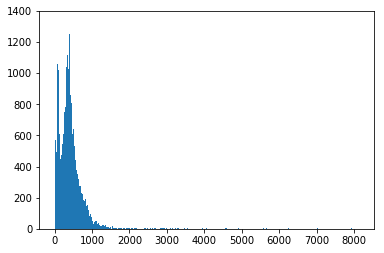

In [37]:
plt.hist([len(x) for x in X], bins = 700) # Plotting a histogram of the number of words in each row
plt.show()

In [38]:
nos = np.array([len(x) for x in X])

In [39]:
len(nos[nos>1000])

1587

In [40]:
maxlen = 1000
X = pad_sequences(X, maxlen = maxlen)

In [41]:
vocab_size = len(tokenizer.word_index) + 1 # Adding a one for the unknown words

In [42]:
vocab = tokenizer.word_index

In [43]:
len(X)

44898

In [44]:
vocab_size

230800

In [45]:
def get_weight_matrix(model):
    weight_matrix = np.zeros((vocab_size, DIM))
    
    for word, i in vocab.items():
        weight_matrix[i] = model.wv[word]
        
    return weight_matrix

In [46]:
embedding_vectors = get_weight_matrix(w2v_model)

In [47]:
len(embedding_vectors)

230800

In [48]:
# Add this based on 

from tensorflow.core.protobuf import rewriter_config_pb2
from tensorflow.keras.backend import set_session
import tensorflow as tf
tf.keras.backend.clear_session()  # For easy reset of notebook state.

config_proto = tf.ConfigProto()
off = rewriter_config_pb2.RewriterConfig.OFF
config_proto.graph_options.rewrite_options.arithmetic_optimization = off
session = tf.Session(config=config_proto)
set_session(session)

In [49]:
model = Sequential()
model.add(Embedding(vocab_size, output_dim = DIM, weights = [embedding_vectors], input_length = maxlen, trainable = True))

Instructions for updating:
Colocations handled automatically by placer.


In [50]:
model.add(LSTM(units = 128))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['acc'])

In [51]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 1000, 100)         23080000  
_________________________________________________________________
lstm (LSTM)                  (None, 128)               117248    
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 23,197,377
Trainable params: 23,197,377
Non-trainable params: 0
_________________________________________________________________


In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [53]:
model.fit(X_train, y_train, epochs = 6, validation_split = 0.3)

Train on 23571 samples, validate on 10102 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/6
23571/23571 [==============================] - 1823s 77ms/sample - loss: 0.0852 - acc: 0.9686 - val_loss: 0.0455 - val_acc: 0.9851
Epoch 2/6
23571/23571 [==============================] - 2161s 92ms/sample - loss: 0.0216 - acc: 0.9931 - val_loss: 0.0328 - val_acc: 0.9883
Epoch 3/6
23571/23571 [==============================] - 2151s 91ms/sample - loss: 0.0069 - acc: 0.9981 - val_loss: 0.0273 - val_acc: 0.9932
Epoch 4/6
23571/23571 [==============================] - 1972s 84ms/sample - loss: 0.0033 - acc: 0.9991 - val_loss: 0.0325 - val_acc: 0.9906
Epoch 5/6
23571/23571 [==============================] - 1929s 82ms/sample - loss: 0.0020 - acc: 0.9996 - val_loss: 0.0343 - val_acc: 0.9908
Epoch 6/6
23571/23571 [==============================] - 1965s 83ms/sample - loss: 0.0029 - acc: 0.9994 - val_loss: 0.0503 - val_acc: 0.9861


In [54]:
y_pred = (model.predict(X_test) >= 0.5).astype(int)

In [55]:
accuracy_score(y_test, y_pred)

0.9875278396436525

In [56]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      5857
           1       0.99      0.98      0.99      5368

   micro avg       0.99      0.99      0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225



In [57]:
# Testing the model with some fake news
x = 'This is some news'
x = tokenizer.texts_to_sequences(x)
x = pad_sequences(x, maxlen = maxlen)

In [60]:
x

array([[   0,    0,    0, ...,    0,    0,   33],
       [   0,    0,    0, ...,    0,    0, 4095],
       [   0,    0,    0, ...,    0,    0,    0],
       ...,
       [   0,    0,    0, ...,    0,    0, 3123],
       [   0,    0,    0, ...,    0,    0,   43],
       [   0,    0,    0, ...,    0,    0,    0]])

In [58]:
(model.predict(x) >= 0.5).astype(int)

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]])

In [59]:
# Testing the model with a real news
x = 'In the latest "disclosure", Maharashtra minister Nawab Malik on Monday claimed that the sister-in-law of Narcotics Control Bureau zonal director, Sameer Wankhede, has a pending drug case against her in the Pune court.'
x = tokenizer.texts_to_sequences(x)
x = pad_sequences(x, maxlen = maxlen)
(model.predict(x) >= 0.5).astype(int)

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    